In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
covid = pd.read_csv('covid.csv')

In [3]:
covid.head(10)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
5,2020-02-04,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
6,2020-02-05,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
7,2020-02-06,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
8,2020-02-07,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
9,2020-02-08,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [20]:
covid.rename(columns={"Name of State / UT": "Name of State","Total Confirmed cases":"Confirmed","Cured/Discharged/Migrated":"Cured"}, inplace=True)

In [21]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4692 non-null   datetime64[ns]
 1   Name of State  4692 non-null   object        
 2   Confirmed      4692 non-null   float64       
 3   Death          4691 non-null   float64       
 4   Cured          4692 non-null   float64       
 5   New cases      4692 non-null   int64         
 6   New deaths     4692 non-null   int64         
 7   New recovered  4692 non-null   int64         
 8   Active_Cases   4691 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 330.0+ KB


In [22]:
covid.describe()

,Date,Confirmed,Death,Cured,New cases,New deaths,New recovered,Active_Cases
count,4692,4692.000000,4691.000000,4692.000000,4692.000000,4692.0,4692.000000,4691.000000
mean,2020-05-26 10:15:02.301790208,11393.925192,291.280750,6908.130648,418.643009,0.0,283.069054,4195.466638
min,2020-01-30 00:00:00,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,0.000000
25%,2020-04-21 00:00:00,39.000000,0.000000,9.000000,1.000000,0.0,0.000000,22.000000
50%,2020-05-27 00:00:00,619.000000,5.000000,197.500000,26.000000,0.0,8.000000,335.000000
75%,2020-07-02 00:00:00,5233.000000,68.500000,2736.000000,210.250000,0.0,119.000000,2202.500000
max,2020-08-06 00:00:00,468265.000000,16476.000000,305521.000000,18366.000000,0.0,13401.000000,150966.000000
std,NaN,37208.600846,1213.817206,23390.671258,1259.748923,0.0,947.925811,13692.373616


In [ ]:
covid = covid.drop(columns=['Latitude', 'Longitude'], axis=1)

In [24]:
covid.describe()

,Date,Confirmed,Death,Cured,New cases,New deaths,New recovered,Active_Cases
count,4692,4692.000000,4691.000000,4692.000000,4692.000000,4692.0,4692.000000,4691.000000
mean,2020-05-26 10:15:02.301790208,11393.925192,291.280750,6908.130648,418.643009,0.0,283.069054,4195.466638
min,2020-01-30 00:00:00,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,0.000000
25%,2020-04-21 00:00:00,39.000000,0.000000,9.000000,1.000000,0.0,0.000000,22.000000
50%,2020-05-27 00:00:00,619.000000,5.000000,197.500000,26.000000,0.0,8.000000,335.000000
75%,2020-07-02 00:00:00,5233.000000,68.500000,2736.000000,210.250000,0.0,119.000000,2202.500000
max,2020-08-06 00:00:00,468265.000000,16476.000000,305521.000000,18366.000000,0.0,13401.000000,150966.000000
std,NaN,37208.600846,1213.817206,23390.671258,1259.748923,0.0,947.925811,13692.373616


In [8]:
vaccine = pd.read_csv('vaccine.csv')

In [9]:
vaccine.head(10)

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Dose 1 15-18,Dose 2 15-18,Dose 1 12-14,Dose 2 12-14,Precaution 18-59,Population
0,Andaman And Nicobar,991264,313284,320383,19208,18860,15124,14042,236936,399001
1,Andhra Pradesh,110957430,40645695,43555744,2535344,2527613,1523375,1495445,12054868,91702478
2,Arunachal Pradesh,1924584,861396,748505,59100,44869,40852,28445,81191,1711947
3,Assam,50335778,22550941,20575569,1262520,972402,999552,602283,2108179,35998752
4,Bihar,157293015,62956601,59160917,6240650,5348480,4288630,3403195,12022637,128500364
5,Chandigarh,2291937,1090035,921251,57708,43907,38210,26050,51034,1158040
6,Chhattisgarh,49167939,18956734,18537851,1234990,1053338,1076071,752571,5750424,32199722
7,Dadra And Nagar Haveli And Daman And Diu,1580060,730855,595090,31509,26943,19989,14929,138137,773997
8,Delhi,37409355,16605099,14356077,1008977,870793,683771,490644,2337340,19301096
9,Goa,2874477,1355046,1224544,51734,44551,33265,26640,61965,1521992


In [25]:
covid['Date'] = pd.to_datetime(covid['Date'], format='%Y-%m-%d')

In [26]:
covid.head(2)

,Date,Name of State,Confirmed,Death,Cured,New cases,New deaths,New recovered,Active_Cases
0,2020-01-30,Kerala,1.0,0.0,0.0,0,0,0,1.0
1,2020-01-31,Kerala,1.0,0.0,0.0,0,0,0,1.0


In [27]:
covid['Confirmed'] = pd.to_numeric(covid['Confirmed'], errors='coerce')
covid['Cured'] = pd.to_numeric(covid['Cured'], errors='coerce')
covid['Death'] = pd.to_numeric(covid['Death'], errors='coerce')


In [28]:
# Total comfirmed cases
covid['Active_Cases']=covid['Confirmed'] - (covid['Cured'] + covid['Death'])
covid.tail()

,Date,Name of State,Confirmed,Death,Cured,New cases,New deaths,New recovered,Active_Cases
4687,2020-08-06,Telangana,73050.0,589.0,52103.0,2092,0,1289,20358.0
4688,2020-08-06,Tripura,5725.0,31.0,3793.0,97,0,68,1901.0
4689,2020-08-06,Uttar Pradesh,104388.0,1857.0,60558.0,4078,0,3287,41973.0
4690,2020-08-06,Uttarakhand,8254.0,98.0,5233.0,246,0,386,2923.0
4691,2020-08-06,West Bengal,83800.0,1846.0,58962.0,2816,0,2078,22992.0


In [29]:
statewise = pd.pivot_table(covid,values=["Confirmed","Death","Cured"],index="Name of State",aggfunc=max)


/tmp/ipykernel_1726/3590690605.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise = pd.pivot_table(covid,values=["Confirmed","Death","Cured"],index="Name of State",aggfunc=max)


In [30]:
statewise['Death'] = pd.to_numeric(statewise['Death'], errors='coerce')
statewise['Confirmed'] = pd.to_numeric(statewise['Confirmed'], errors='coerce')

In [31]:
statewise["Recovery Rate"]= statewise['Cured']*100/statewise['Confirmed']

In [32]:
statewise["Mortality Rate"]= statewise['Death']*100/statewise['Confirmed']

In [33]:
statewise = statewise.sort_values(by = "Confirmed", ascending=False)

In [34]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Death,Recovery Rate,Mortality Rate
Name of State,,,,,
Maharashtra,468265.000000,305521.000000,16476.000000,65.245320,3.518520
Tamil Nadu,273460.000000,214815.000000,4461.000000,78.554450,1.631317
Andhra Pradesh,186461.000000,104354.000000,1681.000000,55.965591,0.901529
Karnataka,151449.000000,74679.000000,2804.000000,49.309669,1.851448
Delhi,140232.000000,126116.000000,4044.000000,89.933824,2.883793
Uttar Pradesh,104388.000000,60558.000000,1857.000000,58.012415,1.778940
West Bengal,83800.000000,58962.000000,1846.000000,70.360382,2.202864
Telangana,73050.000000,52103.000000,589.000000,71.325120,0.806297
Gujarat,66669.000000,49433.000000,2556.000000,74.146905,3.833866


In [35]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4692 non-null   datetime64[ns]
 1   Name of State  4692 non-null   object        
 2   Confirmed      4692 non-null   float64       
 3   Death          4691 non-null   float64       
 4   Cured          4692 non-null   float64       
 5   New cases      4692 non-null   int64         
 6   New deaths     4692 non-null   int64         
 7   New recovered  4692 non-null   int64         
 8   Active_Cases   4691 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 330.0+ KB


In [41]:
# Top 10 active cases stattes
Top_10_Active_cases=covid.groupby(by='Name of State').max()[['Active_Cases','Date']].sort_values(
    by = ['Active_Cases'], ascending=False).reset_index()

In [42]:
fig = plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in India')

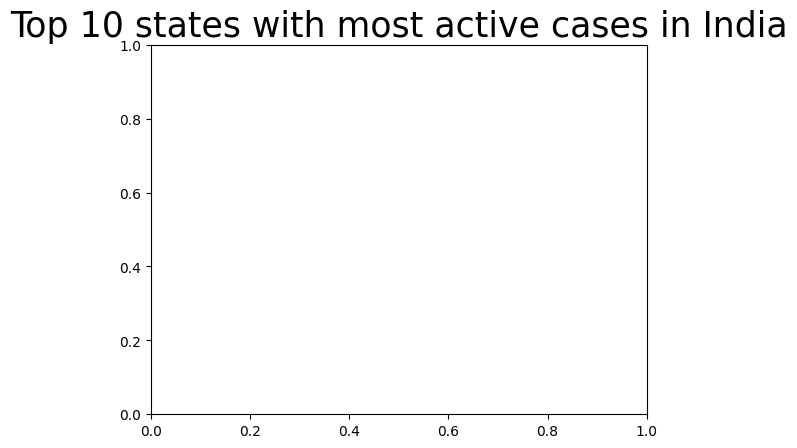

In [38]:
plt.title("Top 10 states with most active cases in India", size =25)

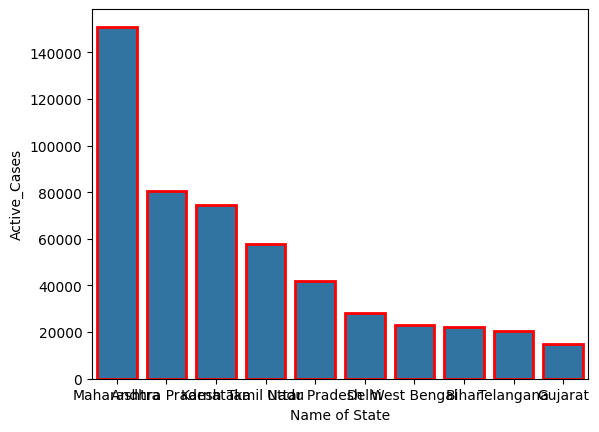

In [44]:
ax = sns.barplot(data = Top_10_Active_cases.iloc[:10], y = "Active_Cases",x="Name of State",linewidth = 2, edgecolor = 'red')

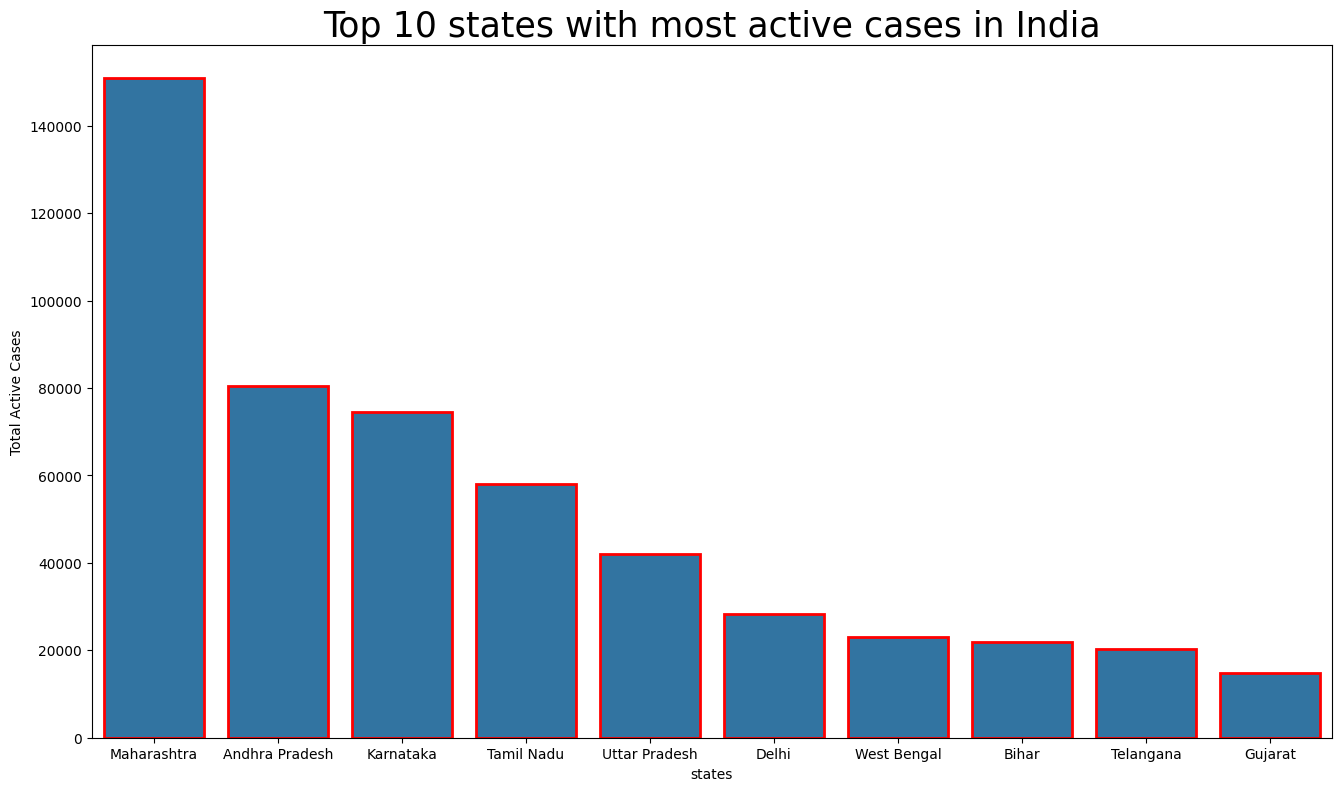

In [46]:
Top_10_Active_cases=covid.groupby(by='Name of State').max()[['Active_Cases','Date']].sort_values(
    by = ['Active_Cases'], ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in India", size =25)
ax = sns.barplot(data = Top_10_Active_cases.iloc[:10], y = "Active_Cases",x="Name of State",linewidth = 2, edgecolor = 'red')
plt.xlabel("states")
plt.ylabel("Total Active Cases")
plt.show()